# Exercise 2.10

_Consider the data in the table 2.1 Starting with a flat prior for each
energy, find an estimate for the efficiency (success parameter p) as well as an uncertainty. For the estimate of the parameter, take the mode of the posterior probability
for p
and use the smallest interval to find the 68 % probability range. Make a plot
of the result._

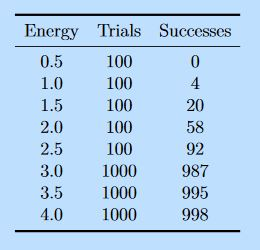

![dataanalysis_2_10_data.JPG](attachment:dataanalysis_2_10_data.JPG)

In [172]:
#Libraries that will be used for this excercise
from math import factorial

import numpy as np #Fast and reliable array calculations and math
import matplotlib.pyplot as plt #Creating and manipulating plots

from scipy.stats import binom
from scipy.special import binom as binom_coef

In [173]:
def posterior(p, r, N):# For the Binomial distribution and a flat Prior P_0=1, as given in the lecture.
    factor1 = factorial(N + 1.)/(factorial(r)*factorial(N-r))
    factor2 = pow(p,r) * pow((1. - p),(N - r))
    return factor1 * factor2

In [174]:
# Defining numpy arrays of the given data
Energies = np.array([0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.])
Trials = np.array([100, 100, 100, 100, 100, 1000, 1000, 1000])
Successes = np.array([0,4,20,58,92,987,995,998])

In [175]:
# The mode of the posterior with a flat prior was in the lecture given as p* = r/N
Efficiencies_estimate = 1.0*Successes / Trials
Efficiencies_estimate

array([ 0.   ,  0.04 ,  0.2  ,  0.58 ,  0.92 ,  0.987,  0.995,  0.998])

In [176]:
stepsize = 1/10000.
p_values = np.arange(0,1,stepsize)#corresponds to our x axis
posterior_values = list() #will be our y axis
for i in range(len(Energies)):
    posterior_values.append([])
    for p in np.arange(0,1,stepsize):
        posterior_values[i].append(posterior(p, Successes[i], Trials[i]))
posterior_values_array = np.asarray(posterior_values)                                

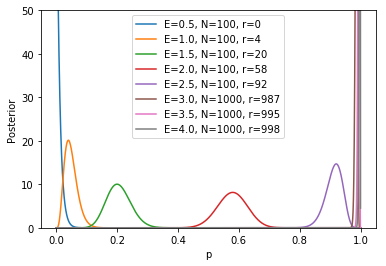

In [177]:
plt.ylim(0,50)
plt.xlabel('p')
plt.ylabel('Posterior')
labels = []
for i in range(len(Energies)):
    labels.append('E='+ str(Energies[i])+', N='+str(Trials[i])+', r='+str(Successes[i]))
    plt.plot(p_values,posterior_values[i],label=labels[i])
    
plt.legend()
plt.show()

## Define the Smallest Interval

In [178]:
def smallest_interval(alpha,p_values,posterior_values):
    sorted_list = list(sorted(zip(posterior_values,p_values),reverse=True))# Sort so that the Entry with highest
    #Probability is the first
    p_min=p_max=acc_sum=i_count=0
    #sorted_list[iter][0] = sorted posterior_values
    #sorted_list[iter][0] = sorted p_values
    mode=sorted_list[0][1]
    
    while acc_sum < (1-alpha):
        acc_sum+=sorted_list[i_count][0] *stepsize
        
        if sorted_list[i_count][1]<mode:
            p_min=sorted_list[i_count][1]
        elif sorted_list[i_count][1]>mode:
            p_max = sorted_list[i_count][1]
            
        i_count+=1
    return p_min, p_max, i_count, acc_sum

(0, 0.0111)
(0.023300000000000001, 0.062800000000000009)


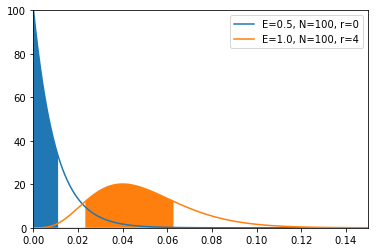

In [179]:
for i in range(2):
    p_min , p_max, p_num, acc_sum= smallest_interval(0.32,p_values,posterior_values[i])
    print(p_min,p_max)
    plt.xlim(0,0.15)
    plt.ylim(0,100)
    plt.plot(p_values,posterior_values[i], label= labels[i])
    plt.fill_between(p_values,posterior_values[i],where= p_values >=p_min)
    plt.fill_between(p_values,posterior_values[i],where= p_values >=p_max,facecolor='white')
plt.legend()
plt.show()

(0.16250000000000001, 0.2414)
(0.53090000000000004, 0.62809999999999999)
(0.89030000000000009, 0.94420000000000004)


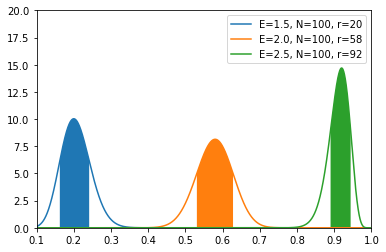

In [180]:
for i in range(2,5):
    p_min , p_max, p_num,acc_sum = smallest_interval(0.32,p_values,posterior_values[i])
    print(p_min,p_max)
    plt.xlim(0.1,1.)
    plt.ylim(0,20)
    plt.plot(p_values,posterior_values[i],label= labels[i])
    plt.fill_between(p_values,posterior_values[i],where= p_values >=p_min)
    plt.fill_between(p_values,posterior_values[i],where= p_values >=p_max,facecolor='white')
plt.legend()
plt.show()

(0.98310000000000008, 0.99020000000000008)
(0.99240000000000006, 0.99690000000000001)
(0.99620000000000009, 0.9991000000000001)


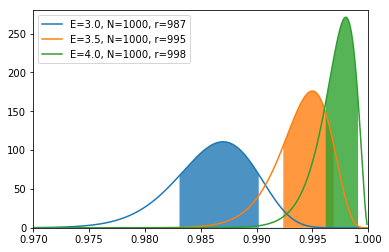

In [184]:
for i in range(5,8):
    p_min , p_max, p_num, acc_sum = smallest_interval(0.32,p_values,posterior_values[i])
    print(p_min,p_max)
    plt.xlim(0.97,1.)
    plt.ylim(0,280)
    plt.plot(p_values,posterior_values[i],label= labels[i])
    plt.fill_between(p_values,posterior_values[i],where= p_values >=p_min,alpha=0.8)
    plt.fill_between(p_values,posterior_values[i],where= p_values >=p_max,facecolor='white')
plt.legend()
plt.show()

Get all the numbers at once:

In [182]:
for i in range(8):
    print(smallest_interval(0.32,p_values,posterior_values[i]))

(0, 0.0111, 112, 0.68282517812524623)
(0.023300000000000001, 0.062800000000000009, 396, 0.68068242984100746)
(0.16250000000000001, 0.2414, 790, 0.680184571468476)
(0.53090000000000004, 0.62809999999999999, 973, 0.6804489583629554)
(0.89030000000000009, 0.94420000000000004, 540, 0.68003273993830804)
(0.98310000000000008, 0.99020000000000008, 72, 0.6816236320987009)
(0.99240000000000006, 0.99690000000000001, 46, 0.68740542372851232)
(0.99620000000000009, 0.9991000000000001, 30, 0.68543765857560712)
